In [1]:
import glob
import sys
import os
from glob import glob
import pandas as pd
import numpy as np

from readWrite import *
from gridModule import *
from operators import *

import matplotlib.pyplot as plt

## LANDMASK AT SURFACE AT T POINTS

landMaskT = np.ma.getmask(np.ma.masked_where(KMT < 1, KMT))
landMaskT3d = getLandMaskT3d()

### READ AVEARAGED FILE #####

averagedFile = AVG_outpath+'POP_time_averaged.nc'

fieldsDF = readField(averagedFile, ['UVEL',
                                    'VVEL',
                                    'WVEL',
                                    'RHO',
                                    'SHF',
                                    'EVAP_F',
                                    'PREC_F',
                                    'TAUX',
                                    'TAUY',
                                    'SALT',
                                    'PD'])

var = fieldsDF.loc[fieldsDF['name'] == 'UVEL']['val']
heading = var.keys()[0]
avg_UVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'VVEL']['val']
heading = var.keys()[0]
avg_VVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'WVEL']['val']
heading = var.keys()[0]
avg_WVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'RHO']['val']
heading = var.keys()[0]
avg_RHO = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'PD']['val']
heading = var.keys()[0]
avg_PD = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'SALT']['val']
heading = var.keys()[0]
avg_SALT = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'SHF']['val']
heading = var.keys()[0]
avg_SHF = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'PREC_F']['val']
heading = var.keys()[0]
avg_PREC_F = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'EVAP_F']['val']
heading = var.keys()[0]
avg_EVAP_F = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'TAUX']['val']
heading = var.keys()[0]
avg_TAUX = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'TAUY']['val']
heading = var.keys()[0]
avg_TAUY = var[heading]

avg_UVEL = np.ma.array(avg_UVEL, mask=landMaskT3d,
                       fill_value=float('nan')).filled()
avg_VVEL = np.ma.array(avg_VVEL, mask=landMaskT3d,
                       fill_value=float('nan')).filled()
avg_WVEL = np.ma.array(avg_WVEL, mask=landMaskT3d,
                       fill_value=float('nan')).filled()
avg_RHO = np.ma.array(avg_RHO, mask=landMaskT3d,
                      fill_value=float('nan')).filled()
avg_PD = np.ma.array(avg_PD, mask=landMaskT3d,
                     fill_value=float('nan')).filled()
avg_SHF = np.ma.array(avg_SHF, mask=landMaskT,
                      fill_value=float('nan')).filled()
avg_EVAP_F = np.ma.array(avg_EVAP_F, mask=landMaskT,
                         fill_value=float('nan')).filled()
avg_PREC_F = np.ma.array(avg_PREC_F, mask=landMaskT,
                         fill_value=float('nan')).filled()
avg_TAUX = np.ma.array(avg_TAUX, mask=landMaskT,
                       fill_value=float('nan')).filled()
avg_TAUY = np.ma.array(avg_TAUY, mask=landMaskT,
                       fill_value=float('nan')).filled()
avg_SALT = np.ma.array(avg_SALT, mask=landMaskT3d,
                       fill_value=float('nan')).filled()

print('Finished reading POP averaged file')
### READ PRODUCT AVERAGED FIELD ####

prd_averagedFile = AVG_outpath+'PRD_time_averaged.nc'

fieldsDF = readField(prd_averagedFile,
                     ['RHO_UVEL',
                      'RHO_VVEL',
                      'RHO_WVEL',
                      'RHO_star',
                      'RHO_star_RHO_star',
                      'UVEL_UVEL',
                      'UVEL_VVEL',
                      'UVEL_WVEL',
                      'VVEL_VVEL',
                      'VVEL_WVEL',
                      'Js_RHO',
                      'Gs_RHO',
                      'TAUX_UVEL',
                      'TAUY_VVEL'])

var = fieldsDF.loc[fieldsDF['name'] == 'RHO_UVEL']['val']
heading = var.keys()[0]
avg_RHO_UVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'RHO_VVEL']['val']
heading = var.keys()[0]
avg_RHO_VVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'RHO_WVEL']['val']
heading = var.keys()[0]
avg_RHO_WVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'RHO_star']['val']
heading = var.keys()[0]
avg_RHO_star = var[heading]
avg_RHO_star_k0 = avg_RHO_star[0,:,:]

var = fieldsDF.loc[fieldsDF['name'] == 'RHO_star_RHO_star']['val']
heading = var.keys()[0]
avg_RHO_star_RHO_star = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'UVEL_UVEL']['val']
heading = var.keys()[0]
avg_UVEL_UVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'UVEL_VVEL']['val']
heading = var.keys()[0]
avg_UVEL_VVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'UVEL_WVEL']['val']
heading = var.keys()[0]
avg_UVEL_WVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'VVEL_VVEL']['val']
heading = var.keys()[0]
avg_VVEL_VVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'VVEL_WVEL']['val']
heading = var.keys()[0]
avg_VVEL_WVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'Js_RHO']['val']
heading = var.keys()[0]
avg_Js_RHO = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'Gs_RHO']['val']
heading = var.keys()[0]
avg_Gs_RHO = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'TAUX_UVEL']['val']
heading = var.keys()[0]
avg_TAUX_UVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'TAUY_VVEL']['val']
heading = var.keys()[0]
avg_TAUY_VVEL = var[heading]


n0 = calc_stratification(avg_PD)
n0_k0 = n0[0,0,0]

avg_RHO_UVEL = np.ma.array(
    avg_RHO_UVEL, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_RHO_VVEL = np.ma.array(
    avg_RHO_VVEL, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_RHO_WVEL = np.ma.array(
    avg_RHO_WVEL, mask=landMaskT3d, fill_value=float('nan')).filled()

avg_RHO_star = np.ma.array(
    avg_RHO_star, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_RHO_star_RHO_star = np.ma.array(
    avg_RHO_star_RHO_star, mask=landMaskT3d, fill_value=float('nan')).filled()

avg_UVEL_UVEL = np.ma.array(
    avg_UVEL_UVEL, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_UVEL_VVEL = np.ma.array(
    avg_UVEL_VVEL, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_UVEL_WVEL = np.ma.array(
    avg_UVEL_WVEL, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_VVEL_VVEL = np.ma.array(
    avg_VVEL_VVEL, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_VVEL_WVEL = np.ma.array(
    avg_VVEL_WVEL, mask=landMaskT3d, fill_value=float('nan')).filled()

avg_Js_RHO = np.ma.array(avg_Js_RHO, mask=landMaskT,
                         fill_value=float('nan')).filled()
avg_Gs_RHO = np.ma.array(avg_Gs_RHO, mask=landMaskT,
                         fill_value=float('nan')).filled()

avg_TAUX_UVEL = np.ma.array(
    avg_TAUX_UVEL, mask=landMaskT, fill_value=float('nan')).filled()
avg_TAUY_VVEL = np.ma.array(
    avg_TAUY_VVEL, mask=landMaskT, fill_value=float('nan')).filled()

print('Finished Reading PRD output files')

##### EDDY PRDS ####

eddy_RHO_UVEL = avg_RHO_UVEL - avg_RHO * avg_UVEL
eddy_RHO_VVEL = avg_RHO_VVEL - avg_RHO * avg_VVEL
eddy_RHO_WVEL = avg_RHO_WVEL - avg_RHO * avg_WVEL
eddy_RHO_star_RHO_star = avg_RHO_star_RHO_star - avg_RHO_star**2
eddy_UVEL_UVEL = avg_UVEL_UVEL - avg_UVEL * avg_UVEL
eddy_UVEL_VVEL = avg_UVEL_VVEL - avg_UVEL * avg_VVEL
eddy_UVEL_WVEL = avg_UVEL_WVEL - avg_UVEL * avg_WVEL
eddy_VVEL_VVEL = avg_VVEL_VVEL - avg_VVEL * avg_VVEL
eddy_VVEL_WVEL = avg_VVEL_WVEL - avg_VVEL * avg_WVEL

avg_Js = avg_SHF/(cp_sw * rho) * 1e7/10000  # changing watt/m^2 to erg/cm^2
avg_SALT_k0 = avg_SALT[0, :, :] / 1000  # changing to msu units from psu
avg_Gs = avg_SALT_k0 * (avg_EVAP_F - avg_PREC_F)/rho_fw * \
    1000/10000  # changing kg/m^2 to g/cm^2

eddy_Js_RHO = avg_Js_RHO - avg_Js * avg_RHO[0,:,:]
eddy_Gs_RHO = avg_Gs_RHO - avg_Gs * avg_RHO[0,:,:]
eddy_TAUX_UVEL = avg_TAUX_UVEL - avg_TAUX * avg_UVEL[0, :, :]
eddy_TAUY_VVEL = avg_TAUY_VVEL - avg_TAUY * avg_VVEL[0, :, :]


print('finished calculating eddy fields')

MAPE_2_MKE = get_MAPE_2_MKE(avg_RHO, avg_WVEL)
EKE_2_MKE = get_EKE_2_MKE(eddy_UVEL_UVEL,
                          eddy_UVEL_VVEL,
                          eddy_UVEL_WVEL,
                          eddy_VVEL_VVEL,
                          eddy_VVEL_WVEL,
                          avg_UVEL,
                          avg_VVEL)
EAPE_2_EKE = get_EAPE_2_EKE(eddy_RHO_WVEL)
EAPE_2_MAPE = get_eddyPE_2_meanPE(eddy_RHO_UVEL, eddy_RHO_VVEL, avg_RHO, n0)


GEN_MAPE = get_GENR_MAPE(avg_Js, avg_Gs, avg_RHO_star_k0, n0_k0)
GEN_EAPE = get_GENR_EAPE(eddy_Js_RHO, eddy_Gs_RHO, n0_k0)
GEN_MKE = get_GENR_MKE(
    avg_TAUX, avg_TAUY, avg_UVEL[0, :, :], avg_VVEL[0, :, :])
GEN_EKE = get_GENR_EKE(eddy_TAUX_UVEL, eddy_TAUY_VVEL)

MAPE = get_meanPE(avg_RHO_star,n0)
MKE = get_meanKE(avg_UVEL, avg_VVEL)
EAPE = get_eddyPE(eddy_RHO_star_RHO_star, n0)
EKE = get_eddyKE(eddy_UVEL_UVEL,eddy_VVEL_VVEL)


diss_MAPE = (EAPE_2_MAPE - MAPE_2_MKE + GEN_MAPE)
diss_EPE = (-EAPE_2_MAPE - EAPE_2_EKE + GEN_EAPE)
diss_MKE = (EKE_2_MKE + MAPE_2_MKE + GEN_MKE)
diss_EKE = (EKE_2_MKE + EAPE_2_EKE + GEN_EKE)


EAPE_2_EKE = EAPE_2_EKE/1e19  #converting from ergs/sec to TW
EAPE_2_MAPE = EAPE_2_MAPE /1e19  #converting from ergs/sec to TW
MAPE_2_MKE = MAPE_2_MKE/1e19  #converting from ergs/sec to TW
EKE_2_MKE =EKE_2_MKE/1e19 #converting from ergs/sec to TW

diss_MAPE = diss_MAPE/1e19  # converting from ergs/sec to TW
diss_EPE = diss_EPE/1e19  # converting from ergs/sec to TW
diss_MKE = diss_MKE/1e19  # converting from ergs/sec to TW
diss_EKE = diss_EKE/1e19  # converting from ergs/sec to TW

GEN_MAPE = GEN_MAPE/1e19 #converting from ergs/sec to TW
GEN_EAPE = GEN_EAPE/1e19  #converting from ergs/sec to TW
GEN_MKE = GEN_MKE/1e19  #converting from ergs/sec to TW
GEN_EKE = GEN_EKE/1e19  #converting from ergs/sec to TW

## tera ... peta ... exa ... zeta

MAPE = MAPE/1e25 #converting from ergs to EJ
MKE = MKE/1e25 #converting from ergs to EJ
EAPE = EAPE/1e25 #converting from ergs to EJ
EKE = EKE/1e25 #converting from ergs to EJ

print("mean_PE to Mean KE = {0:.4f} TW ".format(MAPE_2_MKE))
print("eddy_KE to Mean KE = {0:.4f} TW ".format(EKE_2_MKE))
print("eddy_PE to eddy KE = {0:.4f} TW ".format(EAPE_2_EKE))
print("eddy_PE to Mean PE = {0:.4f} TW \n".format(EAPE_2_MAPE))

print("GEN_Mean PE = {0:.4f} TW ".format(GEN_MAPE))
print("GEN_Eddy PE = {0:.4f} TW ".format(GEN_EAPE))
print("GEN_Mean KE = {0:.4f} TW ".format(GEN_MKE))
print("GEN_Eddy KE = {0:.4f} TW \n".format(GEN_EKE))

print("Diss_Mean PE = {0:.4f} TW ".format(diss_MAPE))
print("Diss_Eddy PE = {0:.4f} TW ".format(diss_EPE))
print("Diss_Mean KE = {0:.4f} TW ".format(diss_MKE))
print("Diss_Eddy KE = {0:.4f} TW \n".format(diss_EKE))

print("Mean PE = {0:.4f} EJ ".format(MAPE))
print("Eddy PE = {0:.4f} EJ ".format(EAPE))
print("Mean KE = {0:.4f} EJ ".format(MKE))
print("Eddy KE = {0:.4f} EJ ".format(EKE))

Finished reading POP averaged file
Finished Reading PRD output files
finished calculating eddy fields
mean_PE to Mean KE = -0.6463 TW 
eddy_KE to Mean KE = -0.0937 TW 
eddy_PE to eddy KE = 0.1539 TW 
eddy_PE to Mean PE = -0.2442 TW 

GEN_Mean PE = 3.5800 TW 
GEN_Eddy PE = 1.0910 TW 
GEN_Mean KE = 1.3217 TW 
GEN_Eddy KE = 0.8420 TW 

Diss_Mean PE = 3.9820 TW 
Diss_Eddy PE = 1.1813 TW 
Diss_Mean KE = 0.5817 TW 
Diss_Eddy KE = 0.9022 TW 

Mean PE = 1517.2671 EJ 
Eddy PE = 9.2132 EJ 
Mean KE = 1.0852 EJ 
Eddy KE = 1.2633 EJ 


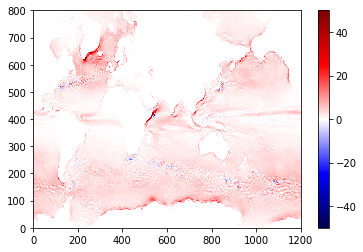

In [12]:
%matplotlib inline
plt.pcolormesh(eddy_TAUX_UVEL + eddy_TAUY_VVEL, cmap='seismic')
plt.clim(-50,50)
plt.colorbar()

In [14]:
import glob
import sys
import os
from glob import glob
import pandas as pd
import numpy as np

from readWrite import *
from gridModule import *
from operators import *

import matplotlib.pyplot as plt

## LANDMASK AT SURFACE AT T POINTS

landMaskT = np.ma.getmask(np.ma.masked_where(KMT < 1, KMT))
landMaskT3d = getLandMaskT3d()

### READ AVEARAGED FILE #####

averagedFile = AVG_outpath+'POP_time_averaged_abs.nc'

fieldsDF = readField(averagedFile, ['UVEL',
                                    'VVEL',
                                    'WVEL',
                                    'RHO',
                                    'SHF',
                                    'EVAP_F',
                                    'PREC_F',
                                    'TAUX',
                                    'TAUY',
                                    'SALT',
                                    'PD'])

var = fieldsDF.loc[fieldsDF['name'] == 'UVEL']['val']
heading = var.keys()[0]
avg_UVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'VVEL']['val']
heading = var.keys()[0]
avg_VVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'WVEL']['val']
heading = var.keys()[0]
avg_WVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'RHO']['val']
heading = var.keys()[0]
avg_RHO = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'PD']['val']
heading = var.keys()[0]
avg_PD = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'SALT']['val']
heading = var.keys()[0]
avg_SALT = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'SHF']['val']
heading = var.keys()[0]
avg_SHF = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'PREC_F']['val']
heading = var.keys()[0]
avg_PREC_F = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'EVAP_F']['val']
heading = var.keys()[0]
avg_EVAP_F = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'TAUX']['val']
heading = var.keys()[0]
avg_TAUX = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'TAUY']['val']
heading = var.keys()[0]
avg_TAUY = var[heading]

avg_UVEL = np.ma.array(avg_UVEL, mask=landMaskT3d,
                       fill_value=float('nan')).filled()
avg_VVEL = np.ma.array(avg_VVEL, mask=landMaskT3d,
                       fill_value=float('nan')).filled()
avg_WVEL = np.ma.array(avg_WVEL, mask=landMaskT3d,
                       fill_value=float('nan')).filled()
avg_RHO = np.ma.array(avg_RHO, mask=landMaskT3d,
                      fill_value=float('nan')).filled()
avg_PD = np.ma.array(avg_PD, mask=landMaskT3d,
                     fill_value=float('nan')).filled()
avg_SHF = np.ma.array(avg_SHF, mask=landMaskT,
                      fill_value=float('nan')).filled()
avg_EVAP_F = np.ma.array(avg_EVAP_F, mask=landMaskT,
                         fill_value=float('nan')).filled()
avg_PREC_F = np.ma.array(avg_PREC_F, mask=landMaskT,
                         fill_value=float('nan')).filled()
avg_TAUX = np.ma.array(avg_TAUX, mask=landMaskT,
                       fill_value=float('nan')).filled()
avg_TAUY = np.ma.array(avg_TAUY, mask=landMaskT,
                       fill_value=float('nan')).filled()
avg_SALT = np.ma.array(avg_SALT, mask=landMaskT3d,
                       fill_value=float('nan')).filled()

print('Finished reading POP averaged file')
### READ PRODUCT AVERAGED FIELD ####

prd_averagedFile = AVG_outpath+'PRD_time_averaged_abs.nc'

fieldsDF = readField(prd_averagedFile,
                     ['RHO_UVEL',
                      'RHO_VVEL',
                      'RHO_WVEL',
                      'RHO_star',
                      'RHO_star_RHO_star',
                      'UVEL_UVEL',
                      'UVEL_VVEL',
                      'UVEL_WVEL',
                      'VVEL_VVEL',
                      'VVEL_WVEL',
                      'Js_RHO',
                      'Gs_RHO',
                      'TAUX_UVEL',
                      'TAUY_VVEL'])

var = fieldsDF.loc[fieldsDF['name'] == 'RHO_UVEL']['val']
heading = var.keys()[0]
avg_RHO_UVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'RHO_VVEL']['val']
heading = var.keys()[0]
avg_RHO_VVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'RHO_WVEL']['val']
heading = var.keys()[0]
avg_RHO_WVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'RHO_star']['val']
heading = var.keys()[0]
avg_RHO_star = var[heading]
avg_RHO_star_k0 = avg_RHO_star[0,:,:]

var = fieldsDF.loc[fieldsDF['name'] == 'RHO_star_RHO_star']['val']
heading = var.keys()[0]
avg_RHO_star_RHO_star = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'UVEL_UVEL']['val']
heading = var.keys()[0]
avg_UVEL_UVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'UVEL_VVEL']['val']
heading = var.keys()[0]
avg_UVEL_VVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'UVEL_WVEL']['val']
heading = var.keys()[0]
avg_UVEL_WVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'VVEL_VVEL']['val']
heading = var.keys()[0]
avg_VVEL_VVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'VVEL_WVEL']['val']
heading = var.keys()[0]
avg_VVEL_WVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'Js_RHO']['val']
heading = var.keys()[0]
avg_Js_RHO = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'Gs_RHO']['val']
heading = var.keys()[0]
avg_Gs_RHO = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'TAUX_UVEL']['val']
heading = var.keys()[0]
avg_TAUX_UVEL = var[heading]

var = fieldsDF.loc[fieldsDF['name'] == 'TAUY_VVEL']['val']
heading = var.keys()[0]
avg_TAUY_VVEL = var[heading]


n0 = calc_stratification(avg_PD)
n0_k0 = n0[0,0,0]

avg_RHO_UVEL = np.ma.array(
    avg_RHO_UVEL, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_RHO_VVEL = np.ma.array(
    avg_RHO_VVEL, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_RHO_WVEL = np.ma.array(
    avg_RHO_WVEL, mask=landMaskT3d, fill_value=float('nan')).filled()

avg_RHO_star = np.ma.array(
    avg_RHO_star, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_RHO_star_RHO_star = np.ma.array(
    avg_RHO_star_RHO_star, mask=landMaskT3d, fill_value=float('nan')).filled()

avg_UVEL_UVEL = np.ma.array(
    avg_UVEL_UVEL, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_UVEL_VVEL = np.ma.array(
    avg_UVEL_VVEL, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_UVEL_WVEL = np.ma.array(
    avg_UVEL_WVEL, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_VVEL_VVEL = np.ma.array(
    avg_VVEL_VVEL, mask=landMaskT3d, fill_value=float('nan')).filled()
avg_VVEL_WVEL = np.ma.array(
    avg_VVEL_WVEL, mask=landMaskT3d, fill_value=float('nan')).filled()

avg_Js_RHO = np.ma.array(avg_Js_RHO, mask=landMaskT,
                         fill_value=float('nan')).filled()
avg_Gs_RHO = np.ma.array(avg_Gs_RHO, mask=landMaskT,
                         fill_value=float('nan')).filled()

avg_TAUX_UVEL = np.ma.array(
    avg_TAUX_UVEL, mask=landMaskT, fill_value=float('nan')).filled()
avg_TAUY_VVEL = np.ma.array(
    avg_TAUY_VVEL, mask=landMaskT, fill_value=float('nan')).filled()

print('Finished Reading PRD output files')

##### EDDY PRDS ####

eddy_RHO_UVEL = avg_RHO_UVEL - avg_RHO * avg_UVEL
eddy_RHO_VVEL = avg_RHO_VVEL - avg_RHO * avg_VVEL
eddy_RHO_WVEL = avg_RHO_WVEL - avg_RHO * avg_WVEL
eddy_RHO_star_RHO_star = avg_RHO_star_RHO_star - avg_RHO_star**2
eddy_UVEL_UVEL = avg_UVEL_UVEL - avg_UVEL * avg_UVEL
eddy_UVEL_VVEL = avg_UVEL_VVEL - avg_UVEL * avg_VVEL
eddy_UVEL_WVEL = avg_UVEL_WVEL - avg_UVEL * avg_WVEL
eddy_VVEL_VVEL = avg_VVEL_VVEL - avg_VVEL * avg_VVEL
eddy_VVEL_WVEL = avg_VVEL_WVEL - avg_VVEL * avg_WVEL

avg_Js = avg_SHF/(cp_sw * rho) * 1e7/10000  # changing watt/m^2 to erg/cm^2
avg_SALT_k0 = avg_SALT[0, :, :] / 1000  # changing to msu units from psu
avg_Gs = avg_SALT_k0 * (avg_EVAP_F - avg_PREC_F)/rho_fw * \
    1000/10000  # changing kg/m^2 to g/cm^2

eddy_Js_RHO = avg_Js_RHO - avg_Js * avg_RHO[0,:,:]
eddy_Gs_RHO = avg_Gs_RHO - avg_Gs * avg_RHO[0,:,:]
eddy_TAUX_UVEL = avg_TAUX_UVEL - avg_TAUX * avg_UVEL[0, :, :]
eddy_TAUY_VVEL = avg_TAUY_VVEL - avg_TAUY * avg_VVEL[0, :, :]


print('finished calculating eddy fields')

MAPE_2_MKE = get_MAPE_2_MKE(avg_RHO, avg_WVEL)
EKE_2_MKE = get_EKE_2_MKE(eddy_UVEL_UVEL,
                          eddy_UVEL_VVEL,
                          eddy_UVEL_WVEL,
                          eddy_VVEL_VVEL,
                          eddy_VVEL_WVEL,
                          avg_UVEL,
                          avg_VVEL)
EAPE_2_EKE = get_EAPE_2_EKE(eddy_RHO_WVEL)
EAPE_2_MAPE = get_eddyPE_2_meanPE(eddy_RHO_UVEL, eddy_RHO_VVEL, avg_RHO, n0)


GEN_MAPE = get_GENR_MAPE(avg_Js, avg_Gs, avg_RHO_star_k0, n0_k0)
GEN_EAPE = get_GENR_EAPE(eddy_Js_RHO, eddy_Gs_RHO, n0_k0)
GEN_MKE = get_GENR_MKE(
    avg_TAUX, avg_TAUY, avg_UVEL[0, :, :], avg_VVEL[0, :, :])
GEN_EKE = get_GENR_EKE(eddy_TAUX_UVEL, eddy_TAUY_VVEL)

MAPE = get_meanPE(avg_RHO_star,n0)
MKE = get_meanKE(avg_UVEL, avg_VVEL)
EAPE = get_eddyPE(eddy_RHO_star_RHO_star, n0)
EKE = get_eddyKE(eddy_UVEL_UVEL,eddy_VVEL_VVEL)


diss_MAPE = (EAPE_2_MAPE - MAPE_2_MKE + GEN_MAPE)
diss_EPE = (-EAPE_2_MAPE - EAPE_2_EKE + GEN_EAPE)
diss_MKE = (EKE_2_MKE + MAPE_2_MKE + GEN_MKE)
diss_EKE = (EKE_2_MKE + EAPE_2_EKE + GEN_EKE)


EAPE_2_EKE = EAPE_2_EKE/1e19  #converting from ergs/sec to TW
EAPE_2_MAPE = EAPE_2_MAPE /1e19  #converting from ergs/sec to TW
MAPE_2_MKE = MAPE_2_MKE/1e19  #converting from ergs/sec to TW
EKE_2_MKE =EKE_2_MKE/1e19 #converting from ergs/sec to TW

diss_MAPE = diss_MAPE/1e19  # converting from ergs/sec to TW
diss_EPE = diss_EPE/1e19  # converting from ergs/sec to TW
diss_MKE = diss_MKE/1e19  # converting from ergs/sec to TW
diss_EKE = diss_EKE/1e19  # converting from ergs/sec to TW

GEN_MAPE = GEN_MAPE/1e19 #converting from ergs/sec to TW
GEN_EAPE = GEN_EAPE/1e19  #converting from ergs/sec to TW
GEN_MKE = GEN_MKE/1e19  #converting from ergs/sec to TW
GEN_EKE = GEN_EKE/1e19  #converting from ergs/sec to TW

## tera ... peta ... exa ... zeta

MAPE = MAPE/1e25 #converting from ergs to EJ
MKE = MKE/1e25 #converting from ergs to EJ
EAPE = EAPE/1e25 #converting from ergs to EJ
EKE = EKE/1e25 #converting from ergs to EJ

print("mean_PE to Mean KE = {0:.4f} TW ".format(MAPE_2_MKE))
print("eddy_KE to Mean KE = {0:.4f} TW ".format(EKE_2_MKE))
print("eddy_PE to eddy KE = {0:.4f} TW ".format(EAPE_2_EKE))
print("eddy_PE to Mean PE = {0:.4f} TW \n".format(EAPE_2_MAPE))

print("GEN_Mean PE = {0:.4f} TW ".format(GEN_MAPE))
print("GEN_Eddy PE = {0:.4f} TW ".format(GEN_EAPE))
print("GEN_Mean KE = {0:.4f} TW ".format(GEN_MKE))
print("GEN_Eddy KE = {0:.4f} TW \n".format(GEN_EKE))

print("Diss_Mean PE = {0:.4f} TW ".format(diss_MAPE))
print("Diss_Eddy PE = {0:.4f} TW ".format(diss_EPE))
print("Diss_Mean KE = {0:.4f} TW ".format(diss_MKE))
print("Diss_Eddy KE = {0:.4f} TW \n".format(diss_EKE))

print("Mean PE = {0:.4f} EJ ".format(MAPE))
print("Eddy PE = {0:.4f} EJ ".format(EAPE))
print("Mean KE = {0:.4f} EJ ".format(MKE))
print("Eddy KE = {0:.4f} EJ ".format(EKE))

Finished reading POP averaged file
Finished Reading PRD output files
finished calculating eddy fields
mean_PE to Mean KE = -0.7245 TW 
eddy_KE to Mean KE = -0.1319 TW 
eddy_PE to eddy KE = 0.1244 TW 
eddy_PE to Mean PE = -0.2824 TW 

GEN_Mean PE = 3.6728 TW 
GEN_Eddy PE = 1.0872 TW 
GEN_Mean KE = 1.4599 TW 
GEN_Eddy KE = 0.9516 TW 

Diss_Mean PE = 4.1150 TW 
Diss_Eddy PE = 1.2452 TW 
Diss_Mean KE = 0.6035 TW 
Diss_Eddy KE = 0.9440 TW 

Mean PE = 1515.0888 EJ 
Eddy PE = 9.8546 EJ 
Mean KE = 1.1392 EJ 
Eddy KE = 1.5633 EJ 


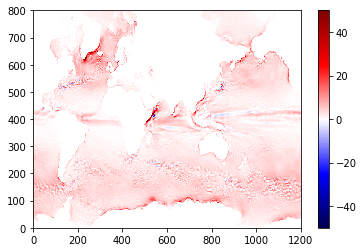

In [15]:
plt.pcolormesh(eddy_TAUX_UVEL + eddy_TAUY_VVEL, cmap='seismic')
plt.clim(-50,50)
plt.colorbar()